## Importing Packages

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#dftest = pd.read_csv('./bank/bank.csv',delimiter=';')

In [3]:
#l1 = list(dftest.columns)
#print(l1)

In [4]:
#df = pd.read_csv('./bank/bank-full.csv',delimiter=';')

## Importing Data

In [19]:
dftest = pd.read_csv('./bank-additional/bank-additional.csv',delimiter=';')

In [20]:
df = pd.read_csv('./bank-additional/bank-additional-full.csv',delimiter=';')

## Data Exploration

Here is the information about the attributes copied-pasted from bank-additional-names.txt

Input variables:
   ##### bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   ##### related with the last contact of the current campaign:
   
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
  ##### other attributes:
  
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  ##### social and economic context attributes
  
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  
  20 - nr.employed: number of employees - quarterly indicator (numeric)
  
  ##### Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

### Age

In [5]:
def is_null(column):
    print (str(sum(df[column].isnull())) + " null values out of " + str(len(df)))
    
is_null('age')

0 null values out of 41188


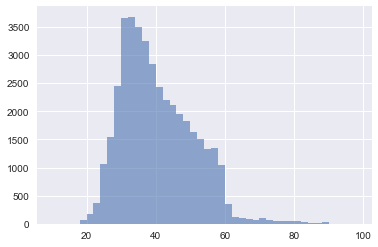

In [6]:
#histogram

df['age'].hist(bins=np.arange(10,100,2),alpha=0.6)

#### Let us compare it to the output variable

In [15]:
print ("Mean : ", df['age'].mean())
print ("Std  : ", df['age'].std())
print ("Skew : ", df['age'].skew())
print ("Kurt : ", df['age'].kurtosis())
print ("Max  : ", df['age'].max())
print ("Min  : ", df['age'].min())

Mean :  40.02406040594348
Std  :  10.421249980934235
Skew :  0.784696815765
Kurt :  0.791311531154
Max  :  98
Min  :  17


In [23]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [24]:
df['y'] = df['y'].map({'yes':1,'no':0})

C:\Users\labuser\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


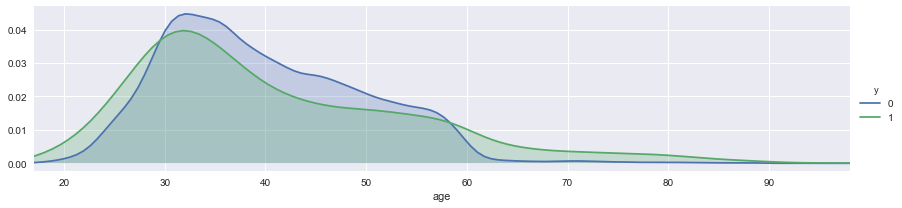

In [11]:
fig = sns.FacetGrid(df,hue='y',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)

oldest = df['age'].max()
youngest = df['age'].min()

fig.set(xlim=(youngest,oldest))

fig.add_legend()

Interesting to not that green plot is above the blue for the young and old demographics (Below 28 and above 58)

### Job

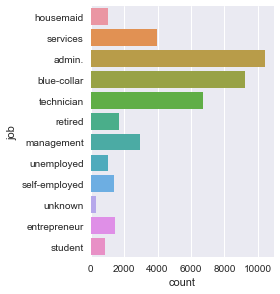

In [12]:
sns.factorplot(data=df,y='job',kind='count')

##### Profession and Age

C:\Users\labuser\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


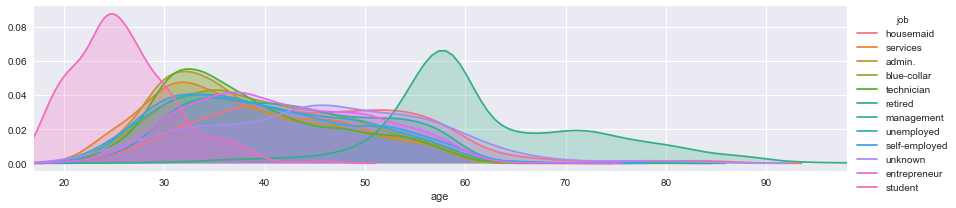

In [13]:
fig = sns.FacetGrid(df,hue='job',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)

oldest = df['age'].max()
youngest = df['age'].min()

fig.set(xlim=(youngest,oldest))

fig.add_legend()

##### Job and y?

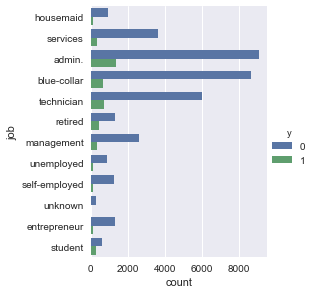

In [14]:
sns.factorplot(data=df,y='job',kind='count',hue='y')

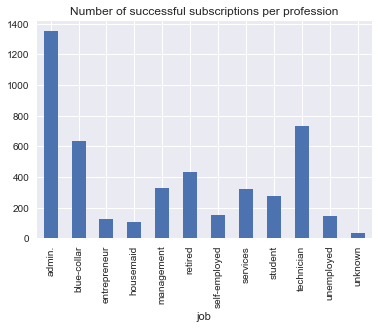

In [15]:
pivot = df.pivot_table(index='job',values='y',aggfunc='sum')
plt.title('Number of successful subscriptions per profession')
pivot.plot(kind='bar')

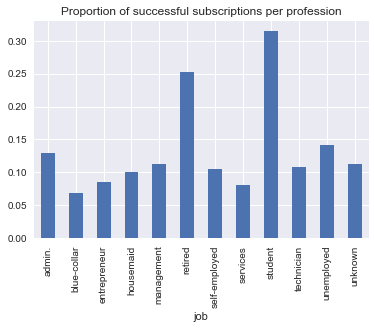

In [16]:
pivot = df.pivot_table(index='job',values='y',aggfunc='mean')
plt.title("Proportion of successful subscriptions per profession")
pivot.plot(kind='bar')

*Admin.* and *technicians* were highest in number to subscribe whereas **retirees** and **students** were proportionately more successful. This is in agreement with the kde plot (age). Students are usually below 28 and retirees are usually older than 58.

#### Marital Status

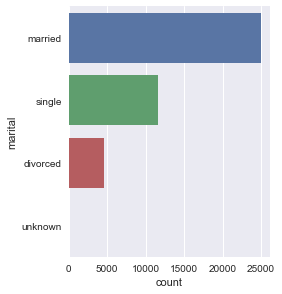

In [26]:
sns.factorplot(data=df,y='marital',kind='count')
df = df[df['marital'] != 'unknown']

Correlation between success (**y**) and **marital status**

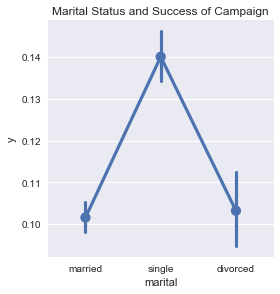

In [27]:
sns.factorplot('marital','y',data=df)
plt.title("Marital Status and Success of Campaign")

**Single** people are more likely to subscribe. Again, those are more likely to be students. Let's just varify that for fun

98 17


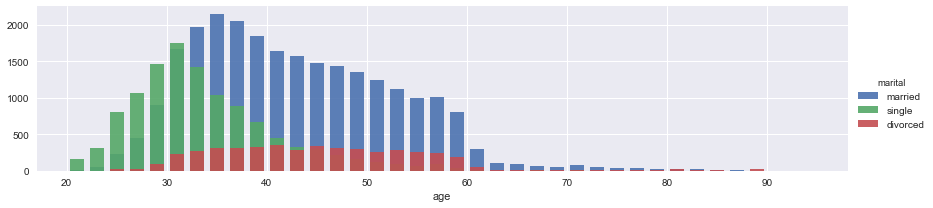

In [19]:
fig = sns.FacetGrid(df,hue='marital',aspect=4)
#fig.map(sns.kdeplot,'age',shade=True)
fig.map(plt.hist,'age',rwidth = 0.7, bins = np.arange(20,100,2), alpha = 0.9)

oldest = df['age'].max()
youngest = df['age'].min()

fig.set(xlim=(youngest,oldest))

fig.add_legend()
print(oldest,youngest)

#### Education

Number of illiterate people - 11


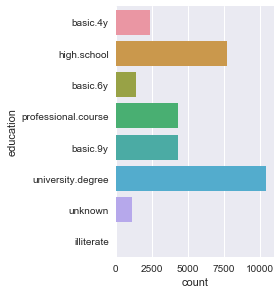

In [39]:
sns.factorplot(data=df,y='education',kind='count')
print("Number of illiterate people - " +str(len(df[df['education'] == 'illiterate'])))
#print(len(df[df['education'] == 'unknown']))
#drop illiterate
#df = df[df['education'] != 'illiterate']

Correlation between success (**y**) and **literacy**

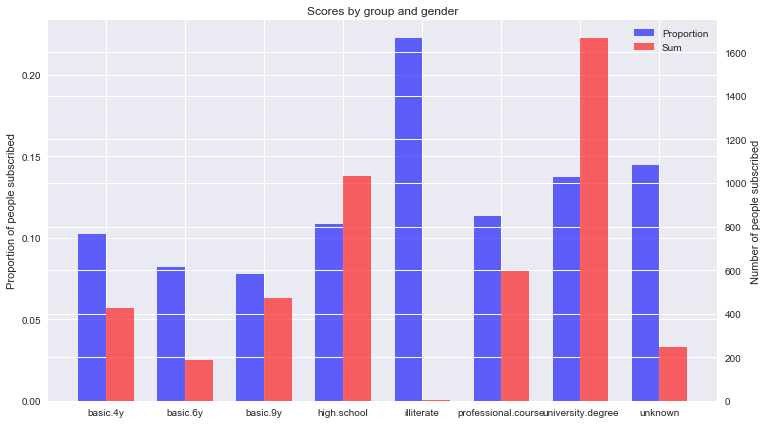

In [104]:
pivot = df.pivot_table(index='education',values='y',aggfunc='mean')
pivot2 = df.pivot_table(index='education',values='y',aggfunc='sum')
#plt.title("Proportion of successful subscriptions for different education levels")
#pivot.plot(kind='bar')

fig, ax1 = plt.subplots(figsize=(12,7))

width = 0.35
#ind = np.array(pivot.index)
ind = np.arange(len(pivot.index))
data1 = list(pivot)
data2 = list(pivot2)
order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']

ax2 = ax1.twinx()

rects1 = ax1.bar(ind,data1,width,color='blue',alpha=0.6)

rects2 = ax2.bar(ind+width,data2,width,color='red',alpha=0.6)

# add some text for labels, title and axes ticks
ax1.set_ylabel('Proportion of people subscribed')
ax2.set_ylabel('Number of people subscribed')
ax1.set_title('Scores by group and gender')

ax1.set_xticks(ind + width / 2)
ax2.set_xticks(ind + width / 2)
ax1.set_xticklabels(list(pivot.index))

ax1.legend((rects1[0], rects2[0]), ('Proportion', 'Sum'))

In [102]:
print(list(pivot.index))

['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


Here, **20%** of illiterate population (total population is insignificantly small) seems to have subscribed. This can be a topic of study. If found substance, more illiterate people can be targeted to improve the overall response.

** Hypothesis Testing **

* Null Hypothesis - Probability of response is same for illiterate as well as other people
* Alternate Hypothesis - Probability of response is more for illiterate people

*2-Sample T-Test*

In [40]:
data = df[df['education'] != 'unknown']
illiterate = data[data['education'] == 'illiterate']['y']
literate = data[data['education'] != 'illiterate']['y']

In [47]:
from statsmodels.stats.weightstats import ttest_ind

t = ttest_ind(illiterate, literate, value=0, alternative='larger')
print ("p-value is {}".format(t[1]))

p-value is 0.07256279929450266


### Credit in default, housing loan and personal loan

Let's just drop unknown for now. (for simplicity in visualization. We can fill the missing values later using random forest)

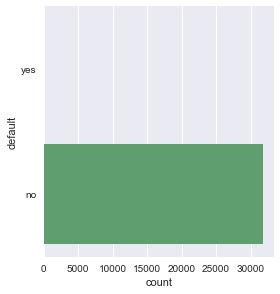

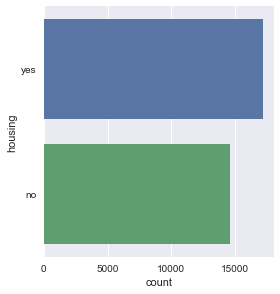

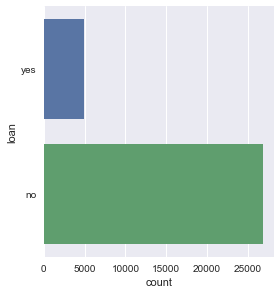

In [31]:
#Credit in default
df = df[df['default']!= 'unknown'][df['housing']!= 'unknown'][df['loan']!= 'unknown']
sns.factorplot(data=df,y='default',kind='count',order=['yes','no'])
sns.factorplot(data=df,y='housing',kind='count',order=['yes','no'])
sns.factorplot(data=df,y='loan',kind='count',order=['yes','no'])
#df = df[df['marital'] != 'unknown']

Any clear trends with respect to y?

In [37]:
print ("Default only has {} instances out of 30000 + where it is 'yes', so it might be safe to drop the variable altogether from the analysis".format(len(df[df['default'] == 'yes'])))

Default only has 3 instances out of 30000 + where it is 'yes', so it might be safe to drop the variable altogether from the analysis


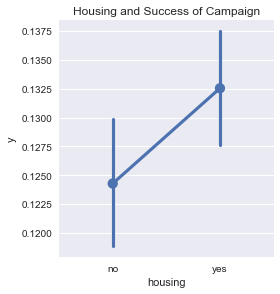

In [38]:
sns.factorplot('housing','y',data=df)
plt.title("Housing and Success of Campaign")

12.5% for no and 13.25% for yes with large standard deviation for both. Can't be sure that there is a strong correlation at this point.

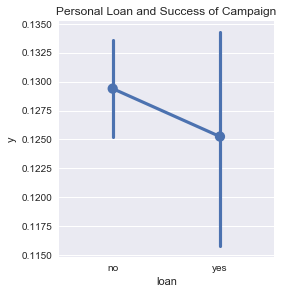

In [49]:
sns.factorplot('loan','y',data=df)
plt.title("Personal Loan and Success of Campaign")

Means 12.8% for no and 12.5% for yes with large std for yes. Can't be sure that there is a strong correlation at this point.

In [50]:
df['contact'].value_counts()

cellular     21260
telephone    10500
Name: contact, dtype: int64

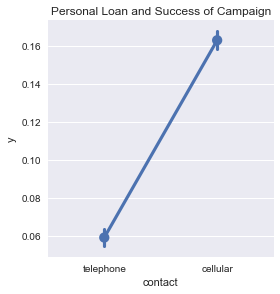

In [52]:
sns.factorplot('contact','y',data=df)
plt.title("Personal Loan and Success of Campaign")

Means 6% for telephone and 16% for cellular with relatively small std. We can obeseve an inclication towards cellular.

In [1]:
# fig, axs = plt.subplots(1,3,figsize=(12,4))
# sns.factorplot('default','y',data=df,order=['yes','no'],ax=axs[0])
# sns.factorplot('housing','y',data=df,order=['yes','no'],ax=axs[1])
# sns.factorplot('loan','y',data=df,order=['yes','no'],ax=axs[2])
# fig.tight_layout()

## Importing Cleaned Data to see correlations between numerical variables

In [55]:
df2 = pd.read_csv("cleaned_bank_data.csv")
df2.head()

,Unnamed: 0,age,education,default,housing,loan,contact,duration,campaign,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0,56,2.0,0.0,0.0,0.0,0,261,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,37,5.0,0.0,1.0,0.0,0,226,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,40,3.0,0.0,0.0,0.0,0,151,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,56,5.0,0.0,0.0,1.0,0,307,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,59,6.0,0.0,0.0,0.0,0,139,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
corr = df2[['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
           'euribor3m', 'nr.employed','y']].corr()

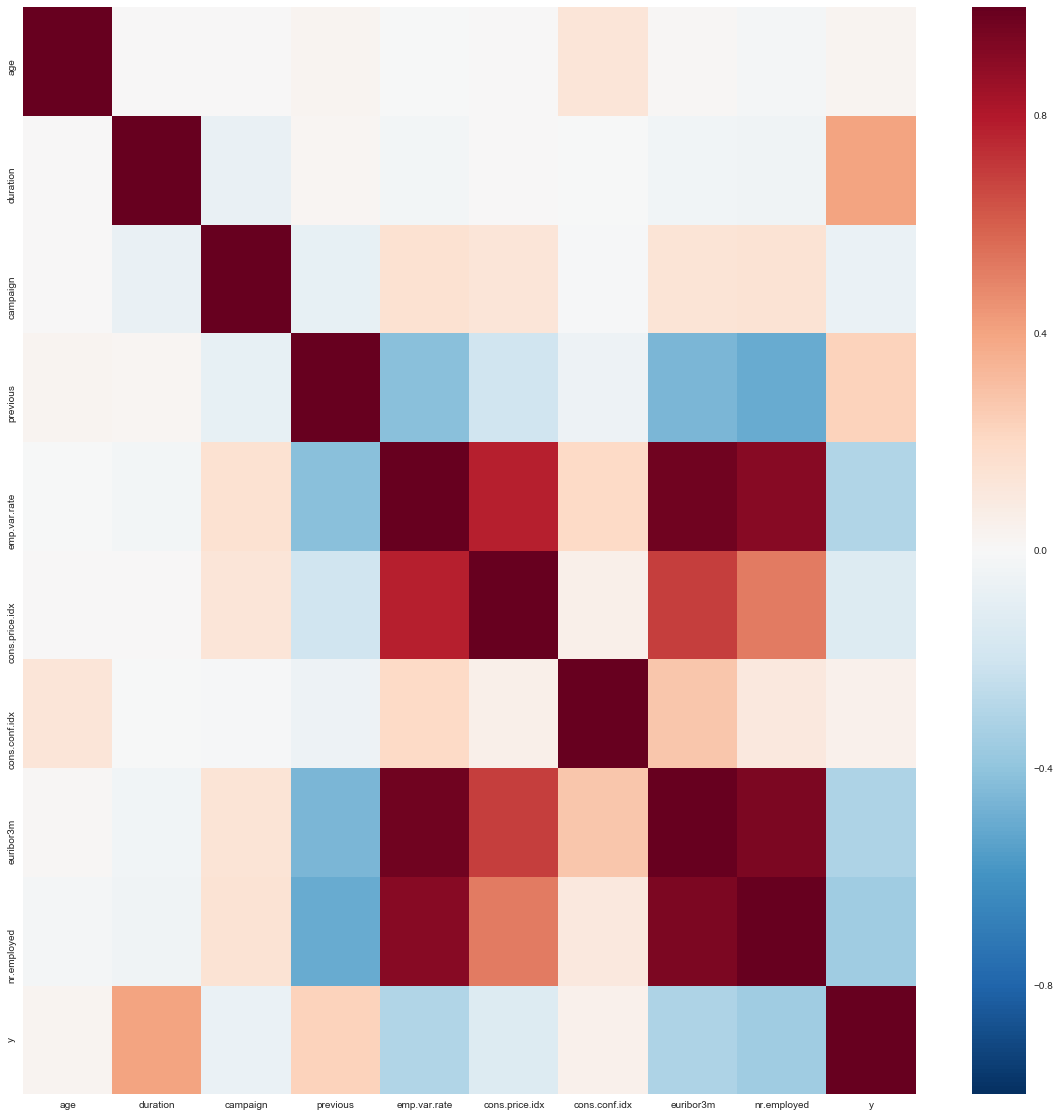

In [68]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)

### Scatter Plots

1. euribor3m v nr.employed
2. emp.var.rate v nr.employed
3. previous - nr.employed
4. cons.price.idx - nr.employed

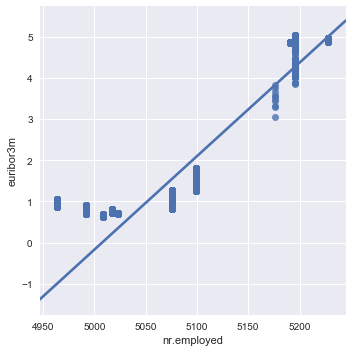

In [62]:
sns.lmplot(y='euribor3m', x='nr.employed', data=df2)

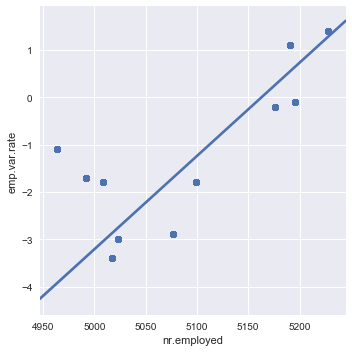

In [63]:
sns.lmplot(y='emp.var.rate', x='nr.employed', data=df2)

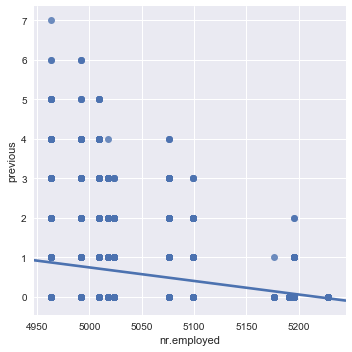

In [64]:
sns.lmplot(y='previous', x='nr.employed', data=df2)

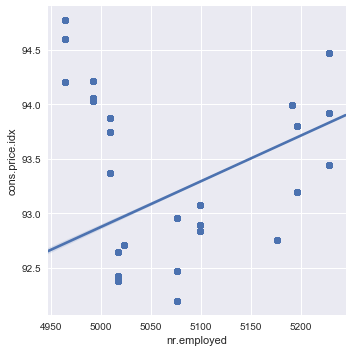

In [66]:
sns.lmplot(y='cons.price.idx', x='nr.employed', data=df2)

### Find Correlations

In [71]:
corr = df2[['previous', 'emp.var.rate', 'cons.price.idx', 
           'euribor3m', 'nr.employed','y']].corr()
corr

,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
previous,1.000000,-0.419388,-0.202222,-0.453471,-0.500273,0.229090
emp.var.rate,-0.419388,1.000000,0.775333,0.972232,0.906822,-0.298024
cons.price.idx,-0.202222,0.775333,1.000000,0.688048,0.521586,-0.135854
euribor3m,-0.453471,0.972232,0.688048,1.000000,0.945140,-0.307590
nr.employed,-0.500273,0.906822,0.521586,0.945140,1.000000,-0.354615
y,0.229090,-0.298024,-0.135854,-0.307590,-0.354615,1.000000
